In [2]:
import tensorflow as tf
print(tf.version.VERSION)

2.8.0


In [3]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 506), reused 1388 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 26.33 MiB/s, done.
Resolving deltas: 100% (506/506), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install -Uqr /content/drive/MyDrive/nlp_disaster_bert/requirements.txt

     |████████████████████████████████| 8.2 MB 2.9 MB/s 
     |████████████████████████████████| 206 kB 44.5 MB/s 
     |████████████████████████████████| 280 kB 46.5 MB/s 
     |████████████████████████████████| 99 kB 8.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 234 kB 49.4 MB/s 
     |████████████████████████████████| 4.2 MB 34.0 MB/s 
     |████████████████████████████████| 1.1 MB 44.2 MB/s 
     |████████████████████████████████| 352 kB 43.6 MB/s 
     |████████████████████████████████| 1.2 MB 41.0 MB/s 
     |████████████████████████████████| 11.2 MB 34.0 MB/s 
     |████████████████████████████████| 47.8 MB 61 kB/s 
     |████████████████████████████████| 596 kB 43.5 MB/s 
     |████████████████████████████████| 4.3 MB 33.0 MB/s 
     |████████████████████████████████| 114 kB 53.0 MB/s 
     |████████████████████████████████| 46 kB 3.3 MB/s 
     |████████████████████████████████| 76 kB 4.7 MB/s 
     |███████████████

In [6]:
!pip install tf-models-official

     |████████████████████████████████| 2.2 MB 5.3 MB/s 
     |████████████████████████████████| 90 kB 8.8 MB/s 
     |████████████████████████████████| 4.9 MB 29.7 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 636 kB 46.4 MB/s 
     |████████████████████████████████| 462 kB 13.6 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=d2f642609b4af5a35a57f3cd5590fb153fc2718176b80f90543227b9d43e0353
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [7]:
import numpy as np
import pandas as pd
import tensorflow_hub as hub
import sys
sys.path.append("models")
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization
import re

In [8]:
df = pd.read_csv("/content/drive/MyDrive/nlp_disaster_bert/disaster_train.csv")

In [ ]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [17]:
df = df.drop(['location'],axis=1)

In [18]:
df.dropna(inplace = True)

In [19]:
df

,id,keyword,text,target
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,Crying out for more! Set me ablaze,0
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...
7578,10830,wrecked,@jt_ruff23 @cameronhacker and I wrecked you both,0
7579,10831,wrecked,Three days off from work and they've pretty mu...,0
7580,10832,wrecked,#FX #forex #trading Cramer: Iger's 3 words tha...,0
7581,10833,wrecked,@engineshed Great atmosphere at the British Li...,0


In [20]:
mislabled = df.groupby(["text"]).nunique().sort_values(by = "target",ascending = False)

In [21]:
mislabled[mislabled['target']>1].reset_index()['text'][0]

'like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit'

In [22]:
df[df['text']=="like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit"]

,id,keyword,text,target
1221,1760,buildings%20burning,like for the music video I want some real acti...,1
1349,1950,burning%20buildings,like for the music video I want some real acti...,0


In [23]:
df['target_relabeled'] = df['target'].copy()
df.loc[df['text'] == 'like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit', 'target_relabeled'] = 0
df.loc[df['text'] == 'Hellfire is surrounded by desires so be careful and donÛªt let your desires control you! #Afterlife', 'target_relabeled'] = 0
df.loc[df['text'] == 'To fight bioterrorism sir.', 'target_relabeled'] = 0
df.loc[df['text'] == '.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4', 'target_relabeled'] = 1
df.loc[df['text'] == 'CLEARED:incident with injury:I-495  inner loop Exit 31 - MD 97/Georgia Ave Silver Spring', 'target_relabeled'] = 1
df.loc[df['text'] == '#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption', 'target_relabeled'] = 0
df.loc[df['text'] == 'In #islam saving a person is equal in reward to saving all humans! Islam is the opposite of terrorism!', 'target_relabeled'] = 0
df.loc[df['text'] == 'Who is bringing the tornadoes and floods. Who is bringing the climate change. God is after America He is plaguing her\n \n#FARRAKHAN #QUOTE', 'target_relabeled'] = 1
df.loc[df['text'] == 'RT NotExplained: The only known image of infamous hijacker D.B. Cooper. http://t.co/JlzK2HdeTG', 'target_relabeled'] = 1
df.loc[df['text'] == "Mmmmmm I'm burning.... I'm burning buildings I'm building.... Oooooohhhh oooh ooh...", 'target_relabeled'] = 0
df.loc[df['text'] == "wowo--=== 12000 Nigerian refugees repatriated from Cameroon", 'target_relabeled'] = 0
df.loc[df['text'] == "He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam", 'target_relabeled'] = 0
df.loc[df['text'] == "Hellfire! We donÛªt even want to think about it or mention it so letÛªs not do anything that leads to it #islam!", 'target_relabeled'] = 0
df.loc[df['text'] == "The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'", 'target_relabeled'] = 0
df.loc[df['text'] == "Caution: breathing may be hazardous to your health.", 'target_relabeled'] = 1
df.loc[df['text'] == "I Pledge Allegiance To The P.O.P.E. And The Burning Buildings of Epic City. ??????", 'target_relabeled'] = 0
df.loc[df['text'] == "#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect", 'target_relabeled'] = 0
df.loc[df['text'] == "that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time", 'target_relabeled'] = 0

In [24]:
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+',"",x))
df['text'] = df['text'].apply(lambda x: re.sub(r"[^\w \s]","",x))
df['text'] =df['text'].apply(lambda x: re.sub(r"[\d]","",x.lower()))
df['text'] = df['text'].apply(lambda x: re.sub(r"[^\w \s]","",x))

In [25]:
text = df["text"]
target = df['target_relabeled']
data = df[['text','target_relabeled']]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_df ,  remaining = train_test_split(data,train_size= 0.8,
                                         stratify = df['target_relabeled'].values)

In [28]:
valid_df = remaining

In [29]:
print(train_df.shape)
print(valid_df.shape)

(6041, 2)
(1511, 2)


In [30]:
train_df['target_relabeled'].values

array([0, 0, 0, ..., 1, 0, 0])

In [31]:
with tf.device("/cpu:0"):
  train_data = tf.data.Dataset.from_tensor_slices((train_df["text"].values,train_df['target_relabeled'].values))
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df['text'].values,valid_df['target_relabeled'].values))

In [32]:
for i,j in train_data.take(1):
  print(i,j)

tf.Tensor(b'landslide trump  bush   via pollster realdonaldtrump', shape=(), dtype=string) tf.Tensor(0, shape=(), dtype=int64)


In [9]:
label_list = [0,1]
max_seq_length = 128
train_batch_size = 32

In [10]:
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2',trainable = True)

In [11]:
vocab_file  = bert_encoder.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_encoder.resolved_object.do_lower_case.numpy()

In [12]:
tokenizer = tokenization.FullTokenizer(vocab_file,do_lower_case)

In [13]:
def feature(text,label,label_list = label_list,max_seq_length=max_seq_length,tokenizer = tokenizer):
  example = classifier_data_lib.InputExample(guid = None,
                                             text_a = text.numpy(),
                                             text_b = None,
                                             label = label.numpy())
  feature =  classifier_data_lib.convert_single_example(0,
                                                     example,
                                                     label_list,
                                                     max_seq_length,
                                                     tokenizer)
  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

In [14]:
def feature_map(text,label):
  input_ids,input_mask,segment_ids,label_id = tf.py_function(feature,inp = [text,label],
                                                             Tout=[tf.int32,tf.int32,tf.int32,tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])
  x = {
      "input_word_ids" : input_ids,
       "input_mask":input_mask,
       "input_type_ids": segment_ids


  }
  return (x,label_id)

In [33]:
from tensorflow.python.data.ops.dataset_ops import AUTOTUNE

with tf.device("/cpu:0"):
  train_data = (train_data.map(feature_map,
                               num_parallel_calls = tf.data.experimental.AUTOTUNE).shuffle(1000).batch(32,drop_remainder = True).prefetch(tf.data.experimental.AUTOTUNE))
  valid_data =(valid_data.map(feature_map,
                               num_parallel_calls = tf.data.experimental.AUTOTUNE).shuffle(1000).batch(32,drop_remainder = True).prefetch(tf.data.experimental.AUTOTUNE))

In [34]:

train_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [35]:
valid_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
# Building the model
def create_model():
  # train data spec
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                         name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                     name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                      name="input_type_ids")

  pooled_output, sequence_output = bert_encoder([input_word_ids, input_mask, input_type_ids])
  drop  = tf.keras.layers.Dropout(0.4)(pooled_output)
  output = tf.keras.layers.Dense(1,activation = "sigmoid",name = 'output')(drop)

  model = tf.keras.Model(
      inputs = {
          "input_word_ids":input_word_ids,
          "input_mask":input_mask,
          "input_type_ids": input_type_ids
          },
      outputs  = output
      )
  return model

In [ ]:
model = create_model()
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy()]
              )
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 128)]        0           []                               
                                                                                                  
 input_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 128, 768)]                'input_mask[0][0]',         

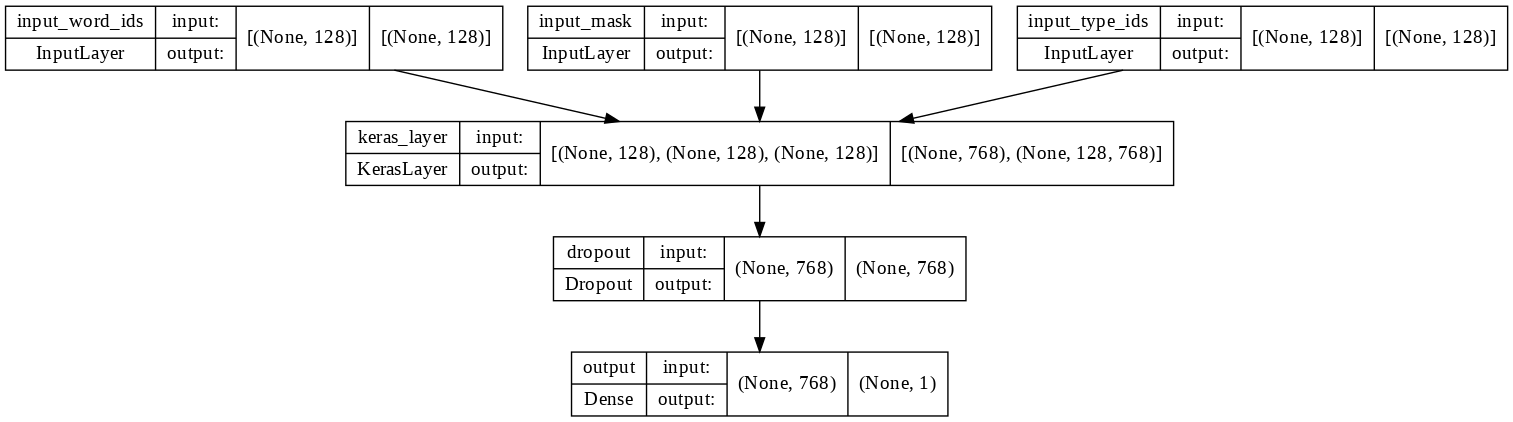

In [ ]:
tf.keras.utils.plot_model(model = model,
                          show_shapes = True,dpi = 100)

In [ ]:
epochs = 5
history = model.fit(train_data,
                    validation_data = valid_data,
                    epochs = epochs,
                    verbose = 1
)

Epoch 1/5
188/188 [==============================] - 185s 847ms/step - loss: 0.4880 - binary_accuracy: 0.7886 - val_loss: 0.4032 - val_binary_accuracy: 0.8258
Epoch 2/5
188/188 [==============================] - 165s 871ms/step - loss: 0.3341 - binary_accuracy: 0.8692 - val_loss: 0.4105 - val_binary_accuracy: 0.8285
Epoch 3/5
188/188 [==============================] - 169s 893ms/step - loss: 0.2279 - binary_accuracy: 0.9172 - val_loss: 0.4409 - val_binary_accuracy: 0.8211
Epoch 4/5
188/188 [==============================] - 170s 900ms/step - loss: 0.1415 - binary_accuracy: 0.9491 - val_loss: 0.5137 - val_binary_accuracy: 0.7979
Epoch 5/5
188/188 [==============================] - 168s 887ms/step - loss: 0.0942 - binary_accuracy: 0.9699 - val_loss: 0.6277 - val_binary_accuracy: 0.8052


In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.1
     |████████████████████████████████| 13.1 MB 14.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.1

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history,metric):
  plt.plot(history.history[metric])
  plt.plot(history.history["val_"+metric])
  plt.xlabel("epochs")
  plt.ylabel(metric)
  plt.legend([metric,"val_"+metric])
  plt.show()

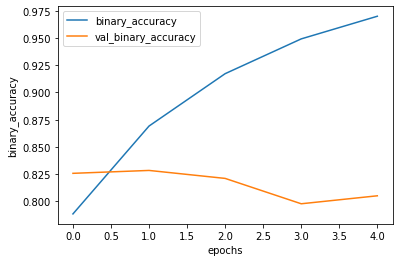

In [ ]:
plot_graphs(history,"binary_accuracy")

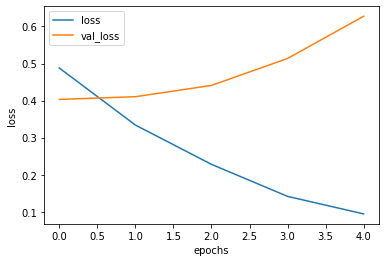

In [ ]:
plot_graphs(history,"loss")

In [ ]:
model.save("/content/drive/MyDrive/nlp_disaster_bert.h5")

In [ ]:
import tensorflow as tf

In [36]:
model = tf.keras.models.load_model("/content/drive/MyDrive/nlp_disaster_bert/nlp_disaster_bert.h5",custom_objects={'KerasLayer':hub.KerasLayer})

In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 128)]        0           []                               
                                                                                                  
 input_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 128, 768)]                'input_mask[0][0]',         

In [ ]:
import time
t1 = time.time()
test = pd.read_csv("/content/drive/MyDrive/nlp_disaster_bert/disaster_test.csv")
t2 = time.time()
print("seconds : ",t2-t1)

seconds :  0.04326510429382324


In [ ]:
import tensorflow  as tf

In [ ]:
import time 
t1 = time.time()
sample = test['text'].values
test_data = tf.data.Dataset.from_tensor_slices((sample,[0]*len(sample)))
test_data = (test_data.map(feature_map).batch(1))
preds = model.predict(test_data)
t2 = time.time()
print("run time: ",t2-t1)

run time:  141.98605227470398


In [ ]:
test['text'][1]

'Heard about #earthquake is different cities, stay safe everyone.'

In [ ]:
test_output = []
for i in preds:
  if i > 0.5:
    test_output.append(1)
  else:
    test_output.append(0)

In [ ]:
sample = ["i play football"]
test_data = tf.data.Dataset.from_tensor_slices((sample,[0]*len(sample)))
test_data = (test_data.map(feature_map).batch(1))
preds = model.predict(test_data)
if preds > .5:
  print("it is disaster tweet")
else :
  print("it is not disaster tweet")


it is not disaster tweet


In [ ]:
output = np.array(test_output)

In [ ]:
test['target'] = output

In [ ]:
test.to_csv("/content/drive/MyDrive/nlp_disaster_bert/test_output.csv")

In [ ]:
import pandas as pd
output = pd.read_csv("/content/drive/MyDrive/nlp_disaster_bert/test_output.csv")

In [ ]:
output

,Unnamed: 0,id,keyword,location,text,target
0,0,0,NaN,NaN,Just happened a terrible car crash,1
1,1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1
...,...,...,...,...,...,...
3258,3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,1
3259,3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,1
3260,3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,1
3261,3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,1


In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/nlp_disaster_bert/submission.csv")

In [ ]:
sub.drop(['target'],axis=1,inplace = True)

In [ ]:
sub['target'] = output['target'].values

In [ ]:
sub.to_csv("/content/drive/MyDrive/submission.csv")

In [ ]:
sub

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [42]:
preds_valid

array([[0.9896541 ],
       [0.9894755 ],
       [0.9827467 ],
       ...,
       [0.00787957],
       [0.9876391 ],
       [0.97477925]], dtype=float32)

In [45]:
preds_valid2  = []
for i in preds_valid:
  if i > 0.5:
    preds_valid2.append(1)
  else:
    preds_valid2.append(0)

In [60]:
import time 
t1 = time.time()
sample = valid_df['text'].values
test_data = tf.data.Dataset.from_tensor_slices((sample,[0]*len(sample)))
test_data = (test_data.map(feature_map).batch(1))
preds_valid = model.predict(test_data)
t2 = time.time()
print("run time: ",t2-t1)

run time:  49.949761629104614


In [47]:
from sklearn.metrics import classification_report


In [61]:
preds_valid2 = []
for i in preds_valid:
  if i > 0.5:
    preds_valid2.append(1)
  else:
    preds_valid2.append(0)

In [64]:
print(classification_report(preds_valid2,valid_df["target_relabeled"].values))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       875
           1       0.93      0.94      0.94       636

    accuracy                           0.95      1511
   macro avg       0.95      0.95      0.95      1511
weighted avg       0.95      0.95      0.95      1511

